In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install tensorflowjs
!pip install -U ipython

In [0]:
import os
from PIL import Image
import numpy as np
import keras_preprocessing
from matplotlib import pyplot as plt
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

In [0]:
rock_dir = os.path.join('/content/drive/My Drive/fb_dev/model/dataset/train/rock')
paper_dir = os.path.join('/content/drive/My Drive/fb_dev/model/dataset/train/paper')
scissors_dir = os.path.join('/content/drive/My Drive/fb_dev/model/dataset/train/scissors')

print('No. of rock images:', len(os.listdir(rock_dir)))
print('No. of paper images:', len(os.listdir(paper_dir)))
print('No. of scissors images:', len(os.listdir(scissors_dir)))

No. of rock images: 124
No. of paper images: 124
No. of scissors images: 124


In [0]:
TRAINING_DIR = "/content/drive/My Drive/fb_dev/model/dataset/train"
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
        )
VALIDATION_DIR = "/content/drive/My Drive/fb_dev/model/dataset/test"
validation_datagen = ImageDataGenerator(
        rescale = 1./255
        )

In [0]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [0]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
"""

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_24 (Activation)   (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_25 (Activation)   (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)       

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),\n    tf.keras.layers.MaxPooling2D(2, 2),\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.5),\n    tf.keras.layers.Dense(32, activation='relu'),\n    tf.keras.layers.Dense(3, activation='softmax')\n])\n"

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

Epoch 1/25
12/12 [==============================] - 21s 2s/step - loss: 1.1251 - accuracy: 0.3387 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 2/25
12/12 [==============================] - 19s 2s/step - loss: 1.1035 - accuracy: 0.3011 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/25
12/12 [==============================] - 19s 2s/step - loss: 1.1008 - accuracy: 0.3091 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 4/25
12/12 [==============================] - 18s 2s/step - loss: 1.0992 - accuracy: 0.3548 - val_loss: 1.0922 - val_accuracy: 0.5185
Epoch 5/25
12/12 [==============================] - 19s 2s/step - loss: 1.0941 - accuracy: 0.4274 - val_loss: 1.0077 - val_accuracy: 0.4444
Epoch 6/25
12/12 [==============================] - 18s 1s/step - loss: 1.0795 - accuracy: 0.4328 - val_loss: 0.9291 - val_accuracy: 0.6296
Epoch 7/25
12/12 [==============================] - 18s 1s/step - loss: 0.9650 - accuracy: 0.5161 - val_loss: 1.0694 - val_accuracy: 0.5185
Epoch 8/25
12/12 [==

In [0]:
saved_model_path = "./my_model.h5"
model.save(saved_model_path)
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

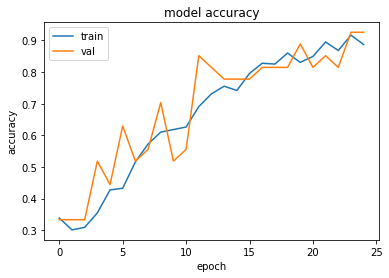

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

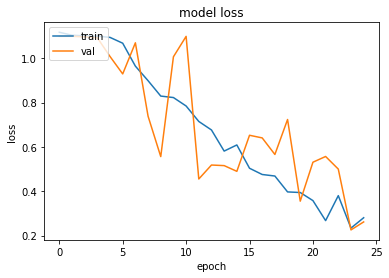

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()